In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
import numpy as np

from sklearn.metrics import mean_absolute_error, recall_score, precision_score, f1_score, confusion_matrix
from scipy.stats import spearmanr

sns.set_theme(style="whitegrid")

In [37]:
esen_d = pd.concat(
    [
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of4_esen-s-d.parquet"), 
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of4_esen-s-d.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_3of4_esen-s-d.parquet"),
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_4of4_esen-s-d.parquet"),
    ]
)
esen_d = esen_d.reset_index(drop=True)
esen_d["esen_d_strain"] = esen_d.local_min_e - esen_d.global_min_e
print(esen_d.shape)
esen_d.isna().sum()

(6947, 18)


ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
mol_bytes                     0
spin_multiplicity             0
id                            0
local_min_mol                83
local_min_e                  83
global_min_mol               53
global_min_e                 53
ligand_strain               134
passes_strain_filter          0
nconfs_converged              0
esen_d_strain               134
dtype: int64

In [38]:
# esen_c = pd.concat(
#     [
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of4_esen-s-c.parquet"), 
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of4_esen-s-c.parquet"),
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_3of4_esen-s-c.parquet"),
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_4of4_esen-s-c.parquet"),
#     ]
# )
# esen_c = esen_c.reset_index(drop=True)
# esen_c["esen_c_strain"] = esen_c.local_min_e - esen_c.global_min_e
# print(esen_c.shape)
# esen_c.isna().sum()

In [39]:
# uma_s = pd.concat(
#     [
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of4_uma-s.parquet"), 
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of4_uma-s.parquet"),
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_3of4_uma-s.parquet"),
#         pd.read_parquet("../results/ligboundconf_2p1_from_xtb_4of4_uma-s.parquet"),
#     ]
# )
# uma_s = uma_s.reset_index(drop=True)
# uma_s["uma_s_strain"] = uma_s.local_min_e - uma_s.global_min_e
# print(uma_s.shape)
# uma_s.isna().sum()

In [40]:
mace = pd.concat(
    [
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_1of2_mace.parquet"), 
        pd.read_parquet("../results/ligboundconf_2p1_from_xtb_2of2_mace.parquet")
    ]
)
mace = mace.reset_index(drop=True)
mace["mace_strain"] = mace.local_min_e - mace.global_min_e
print(mace.shape)
mace.isna().sum()

(6947, 18)


ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
mol_bytes                     0
spin_multiplicity             0
id                            0
local_min_mol              1752
local_min_e                1752
global_min_mol             1088
global_min_e               1088
ligand_strain              1895
passes_strain_filter          0
nconfs_converged              0
mace_strain                1895
dtype: int64

In [41]:
mace.head()

,ligand_id,formal_charge,xtb_local_min_mol,crest_gloabl_min_mol,xtb_local_min_energy,crest_global_min_energy,smiles,mol_bytes,spin_multiplicity,id,local_min_mol,local_min_e,global_min_mol,global_min_e,ligand_strain,passes_strain_filter,nconfs_converged,mace_strain
0,00G_3FUJ_A_710,0,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-4.562781e+05,-456280.830218,[H]C1=C([H])C2=C(C([H])=C1OC([H])([H])C([H])([...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,1,00G_3FUJ_A_710,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-4.562784e+05,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-4.562832e+05,4.774254,True,16,4.774254
1,01I_3MA3_A_313,-2,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-6.686137e+05,-668613.914981,[H]C1=C(C(=O)[O-])OC2=C([H])C3=C4C([H])=C(C(=O...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,1,01I_3MA3_A_313,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-6.685034e+05,"b""\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...",-6.685040e+05,0.585522,True,3,0.585522
2,02Z_3RZB_A_458,0,"b""\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...",b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-6.777694e+05,-677769.719462,[H]C1=C([H])C([H])=C(N([H])C2=NC(N([H])[H])=C(...,"b""\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...",1,02Z_3RZB_A_458,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-6.777702e+05,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-6.777727e+05,2.477207,True,15,2.477207
3,03K_4EK5_A_300,0,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-5.723006e+05,-572300.972592,[H]C1=C([H])C(C(=O)N([H])C2=NN([H])C(C3([H])C(...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,1,03K_4EK5_A_300,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-5.723016e+05,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-5.723029e+05,1.261124,True,20,1.261124
4,03X_3U6H_A_1,0,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-1.139778e+06,NaN,[H]C1=C([H])C(OC2=C([H])C([H])=C(N([H])C(=O)C3...,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,1,03X_3U6H_A_1,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-1.139777e+06,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00...,-1.139780e+06,3.873451,True,18,3.873451


In [42]:
root = pd.read_parquet("../data/ligboundconf_2p1.parquet")
root["dft_strain"] = root.xtb_local_min_energy - root.crest_global_min_energy
root.isna().sum()

ligand_id                     0
formal_charge                 0
xtb_local_min_mol             0
crest_gloabl_min_mol          0
xtb_local_min_energy         72
crest_global_min_energy    1858
smiles                        0
dft_strain                 1859
dtype: int64

In [43]:
root = root[["ligand_id", "formal_charge", "dft_strain"]]
root = root.merge(esen_d[["ligand_id", "esen_d_strain"]], on="ligand_id", how="left")
root = root.merge(mace[["ligand_id", "mace_strain"]], on="ligand_id", how="left")
# root = root.merge(esen_c[["ligand_id", "esen_c_strain"]], on="ligand_id", how="left")
# root = root.merge(uma_s[["ligand_id", "uma_s_strain"]], on="ligand_id", how="left")
root = root[root.formal_charge != 0]
print(root.shape)

root.head()

(3970, 5)


,ligand_id,formal_charge,dft_strain,esen_d_strain,mace_strain
1,01I_3MA3_A_313,-2,0.199977,0.866547,0.585522
5,04J_4KN1_A_301,-2,NaN,17.278944,27.204240
7,051_2XPC_A_500,-2,NaN,NaN,NaN
8,052_4ZEG_A_809,1,NaN,18.943307,15.944207
9,053_3SKA_A_578,-1,NaN,2.468894,3.332970


In [44]:
print("Negative Strains")
print(f"DFT: {(root.dft_strain < 0).sum()}")
print(f"eSEN s d: {(root.esen_d_strain < 0).sum()}")
print(f"MACE: {(root.mace_strain < 0).sum()}")

Negative Strains
DFT: 293
eSEN s d: 35
MACE: 23


In [45]:
root["dft_was_negative"] = root.dft_strain < 0

In [46]:
# map all negative strains to 0
root.loc[root.dft_strain < 0, "dft_strain"] = 0
root.loc[root.esen_d_strain < 0, "esen_d_strain"] = 0
root.loc[root.mace_strain < 0, "mace_strain"] = 0

In [47]:
root = root.dropna(subset="dft_strain")
root.isna().sum()

ligand_id             0
formal_charge         0
dft_strain            0
esen_d_strain        41
mace_strain         807
dft_was_negative      0
dtype: int64

In [48]:
threshold = root.dft_strain.quantile(0.95)
threshold

np.float64(32.70964833120814)

In [49]:
threshold = 14.7

In [50]:
root["passes_dft_filter"] = root.dft_strain < threshold
root["passes_mace_filter"] = root.mace_strain < threshold
root["passes_esen_d_filter"] = root.esen_d_strain < threshold

In [51]:
mace_no_nan = root.dropna(subset="mace_strain")
esen_d_no_nan = root.dropna(subset="esen_d_strain")

mace_no_nan.shape, esen_d_no_nan.shape, root.shape


((1490, 9), (2256, 9), (2297, 9))

In [52]:
print("Failed StrainRelief runs")
print(f"MACE: {root.mace_strain.isna().sum()}/{len(root)} ({1 - root.mace_strain.isna().sum()/len(root):.2%} success rate), {root[root.mace_strain.isna() & ~root.passes_dft_filter].shape[0]} of these are strained")
print(f"eSEN s d: {root.esen_d_strain.isna().sum()}/{len(root)} ({1 - root.esen_d_strain.isna().sum()/len(root):.2%} success rate), {root[root.esen_d_strain.isna() & ~root.passes_dft_filter].shape[0]} of these are strained")


Failed StrainRelief runs
MACE: 807/2297 (64.87% success rate), 244 of these are strained
eSEN s d: 41/2297 (98.22% success rate), 9 of these are strained


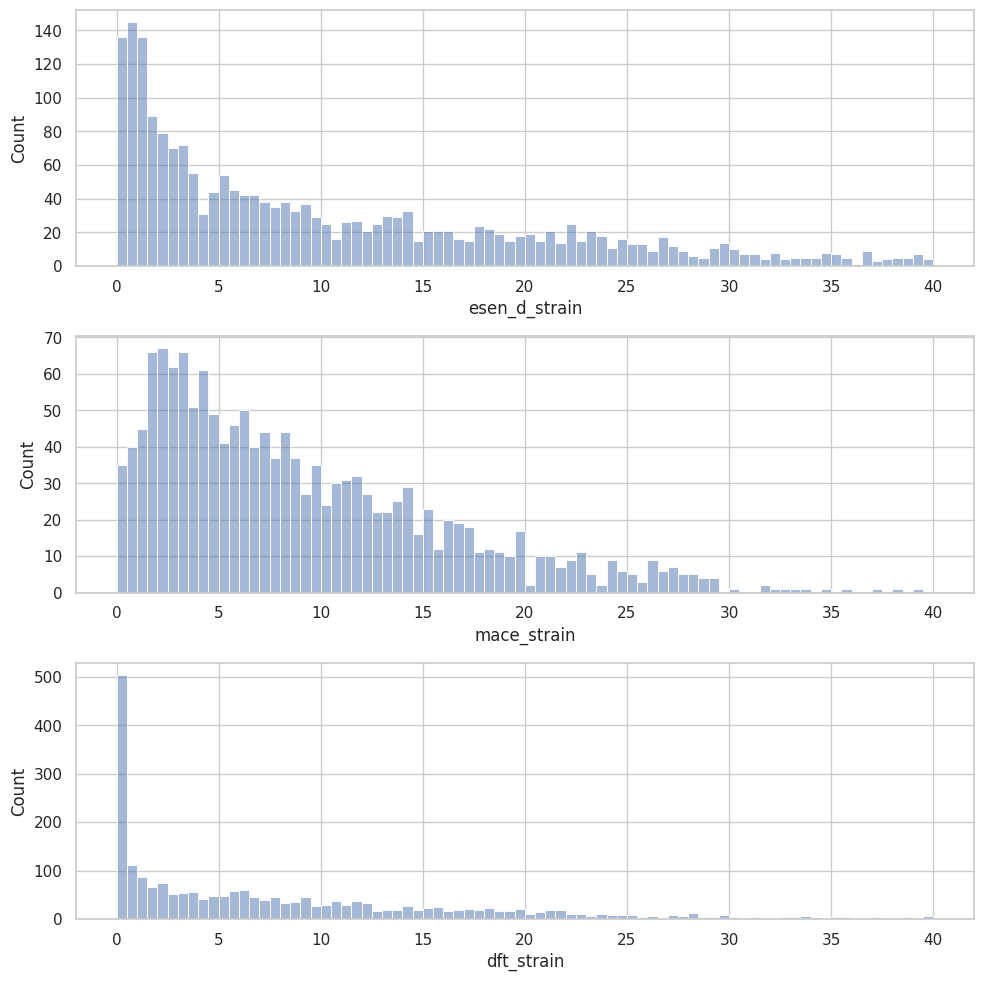

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

sns.histplot(root.esen_d_strain, label="eSEN s d", alpha=0.5, binwidth=0.5, binrange=(0, 40), ax=axs[0])
sns.histplot(root.mace_strain, label="MACE", alpha=0.5, binwidth=0.5, binrange=(0, 40), ax=axs[1])
sns.histplot(root.dft_strain, label="DFT", alpha=0.5, binwidth=0.5, binrange=(0, 40), ax=axs[2])

plt.tight_layout()
plt.show()


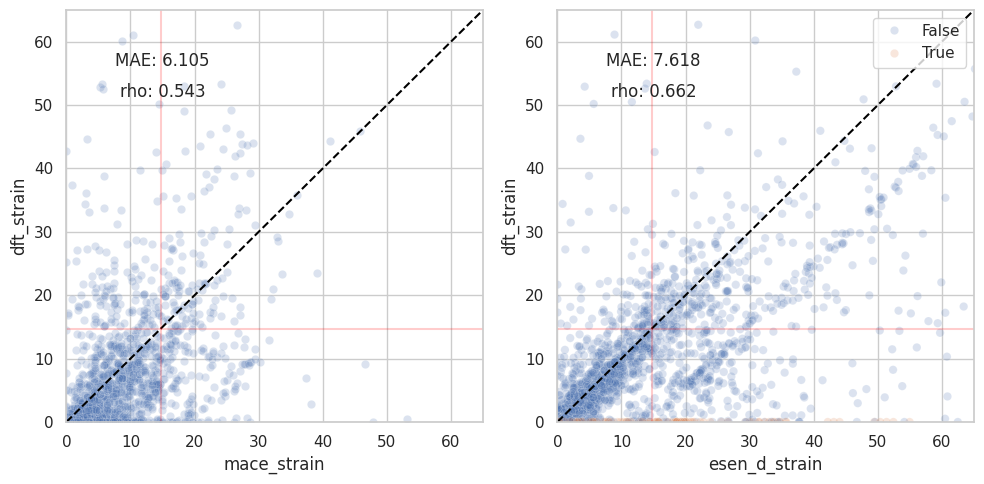

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x="mace_strain", y="dft_strain", data=root, alpha=0.2, ax=axs[0])
sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--", ax=axs[0])
axs[0].text(15, 57, f"MAE: {mean_absolute_error(mace_no_nan.mace_strain, mace_no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
axs[0].text(15, 52, f"rho: {spearmanr(mace_no_nan.mace_strain, mace_no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")

sns.scatterplot(x="esen_d_strain", y="dft_strain", data=root, alpha=0.2, ax=axs[1], hue="dft_was_negative")
sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--", ax=axs[1])
axs[1].text(15, 57, f"MAE: {mean_absolute_error(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
axs[1].text(15, 52, f"rho: {spearmanr(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")

for ax in axs:
    ax.set(xlim=(0, 65), ylim=(0, 65))
    ax.vlines(threshold, 0, 65, color="red", alpha=0.2)
    ax.hlines(threshold, 0, 65, color="red", alpha=0.2)

plt.tight_layout()
plt.show()

In [21]:
def flip_cm(cm):
    _cm = cm.copy()
    _cm[:, 0] = cm[:, 1]
    _cm[:, 1] = cm[:, 0]
    return _cm

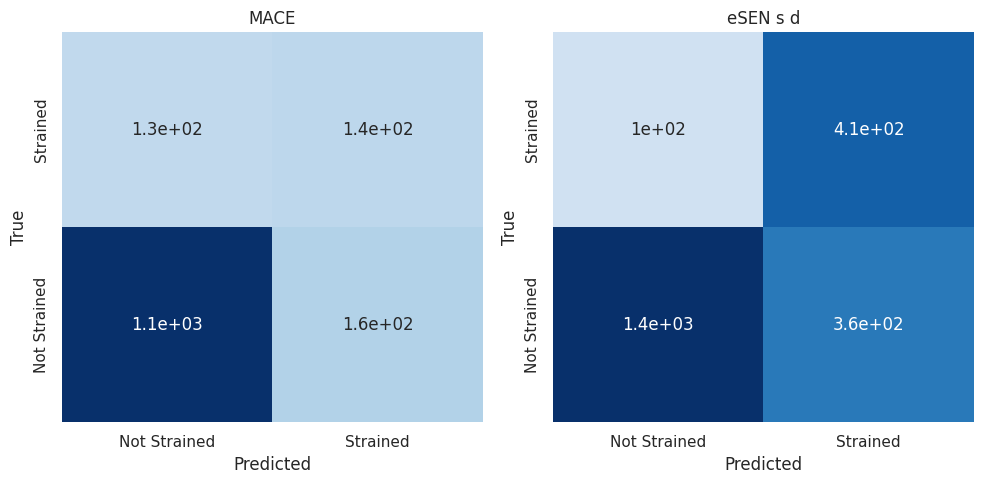

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

cm = confusion_matrix(mace_no_nan.passes_dft_filter, mace_no_nan.passes_mace_filter)
sns.heatmap(flip_cm(cm), annot=True, cmap="Blues", ax=axs[0], cbar=False, vmin=0, vmax=500)
axs[0].set(title="MACE")

cm = confusion_matrix(esen_d_no_nan.passes_dft_filter, esen_d_no_nan.passes_esen_d_filter)
sns.heatmap(flip_cm(cm), annot=True, cmap="Blues", ax=axs[1], cbar=False, vmin=0, vmax=500)
axs[1].set(title="eSEN s d")

for ax in axs:
    ax.set(xlabel="Predicted", ylabel="True", xticklabels=["Not Strained", "Strained"], yticklabels=["Strained", "Not Strained"])

plt.tight_layout()
plt.show()

In [ ]:
# TODO: StrainRelief+mace fails for many strained ligands, therefore esen_s_d is exponentially better

In [55]:
# using no_nan defined for the whole dataset
no_nan = root.dropna()
stats = pd.DataFrame(
    [
        {
            "model": "MACE",
            "mae": mean_absolute_error(no_nan.mace_strain, no_nan.dft_strain),
            "spearman": spearmanr(no_nan.mace_strain, no_nan.dft_strain)[0],
            "precision": precision_score(~no_nan.passes_dft_filter, ~no_nan.passes_mace_filter),
            "recall": recall_score(~no_nan.passes_dft_filter, ~no_nan.passes_mace_filter),
            "f1_score": f1_score(~no_nan.passes_dft_filter, ~no_nan.passes_mace_filter),
        },
        {
            "model": "eSEN s d",
            "mae": mean_absolute_error(no_nan.esen_d_strain, no_nan.dft_strain),
            "spearman": spearmanr(no_nan.esen_d_strain, no_nan.dft_strain)[0],
            "precision": precision_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_d_filter),
            "recall": recall_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_d_filter),
            "f1_score": f1_score(~no_nan.passes_dft_filter, ~no_nan.passes_esen_d_filter),
        }
    ]
)
stats

,model,mae,spearman,precision,recall,f1_score
0,MACE,6.128724,0.547633,0.472973,0.512821,0.492091
1,eSEN s d,4.964709,0.746022,0.626582,0.725275,0.672326


In [56]:
# using the no_nan defined for each pair
lst = []

lst.append({
    "model": "MACE",
    "mae": mean_absolute_error(mace_no_nan.mace_strain, mace_no_nan.dft_strain),
    "spearman": spearmanr(mace_no_nan.mace_strain, mace_no_nan.dft_strain)[0],
    "precision": precision_score(~mace_no_nan.passes_dft_filter, ~mace_no_nan.passes_mace_filter),
    "recall": recall_score(~mace_no_nan.passes_dft_filter, ~mace_no_nan.passes_mace_filter),
    "f1_score": f1_score(~mace_no_nan.passes_dft_filter, ~mace_no_nan.passes_mace_filter),
})

lst.append({    
    "model": "eSEN s d",
    "mae": mean_absolute_error(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain),
    "spearman": spearmanr(esen_d_no_nan.esen_d_strain, esen_d_no_nan.dft_strain)[0],
    "precision": precision_score(~esen_d_no_nan.passes_dft_filter, ~esen_d_no_nan.passes_esen_d_filter),
    "recall": recall_score(~esen_d_no_nan.passes_dft_filter, ~esen_d_no_nan.passes_esen_d_filter),
    "f1_score": f1_score(~esen_d_no_nan.passes_dft_filter, ~esen_d_no_nan.passes_esen_d_filter),
})

stats2 = pd.DataFrame(lst)
stats2

,model,mae,spearman,precision,recall,f1_score
0,MACE,6.104785,0.543093,0.469799,0.512821,0.490368
1,eSEN s d,7.618086,0.662086,0.530639,0.801181,0.638431


-2 (513, 8)


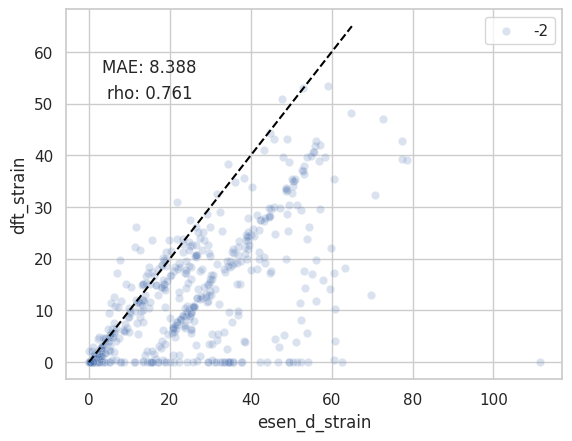

1 (517, 8)


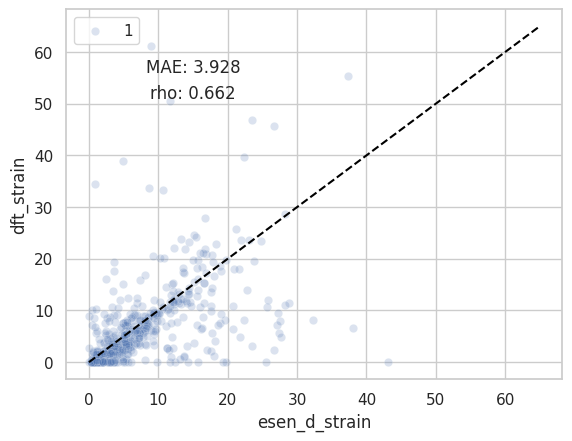

-1 (988, 8)


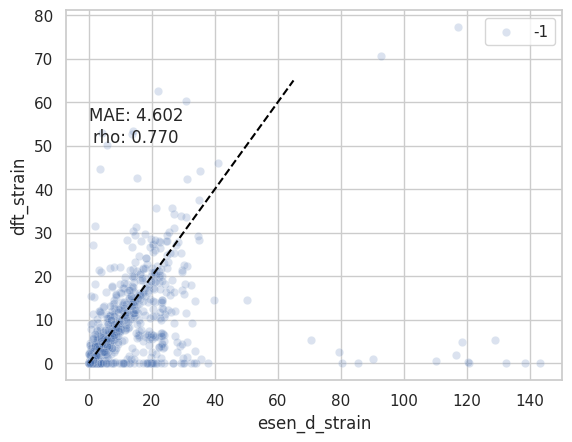

-3 (178, 8)


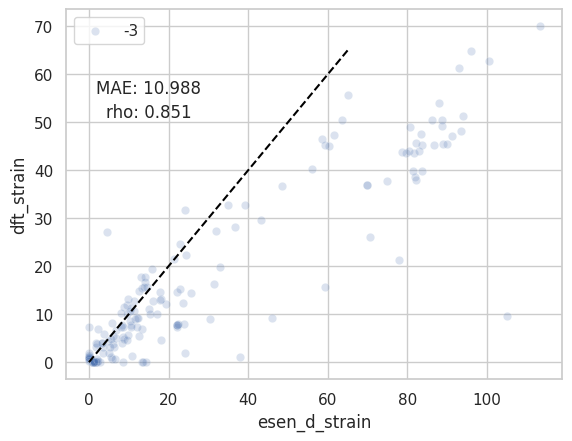

2 (37, 8)


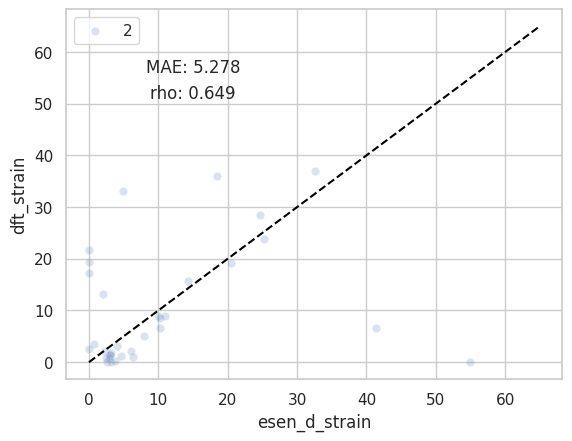

-4 (38, 8)


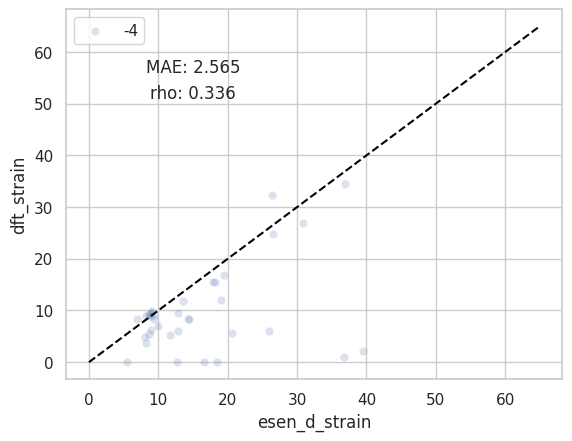

4 (5, 8)


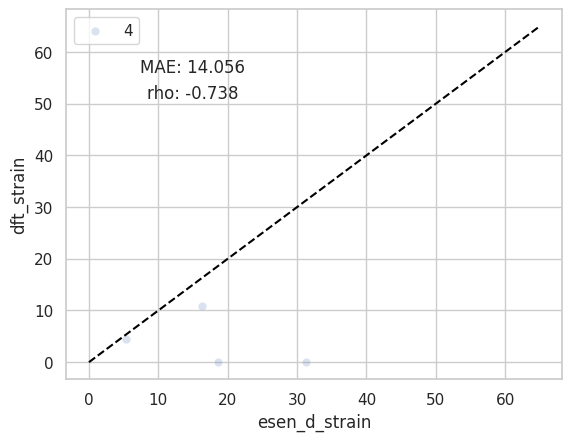

3 (11, 8)


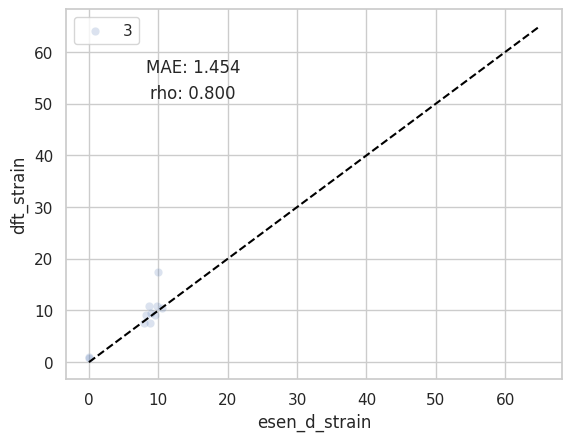

-5 (3, 8)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

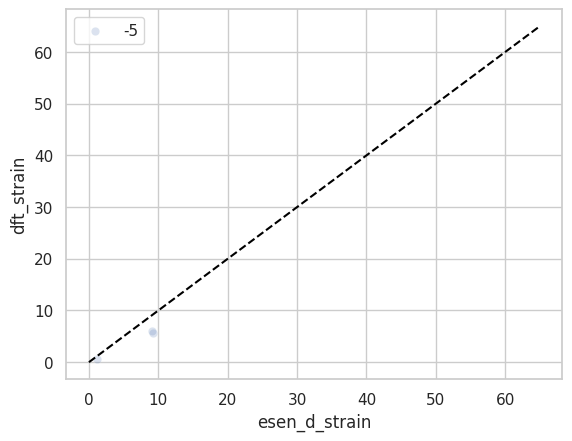

In [ ]:
for ch in root.formal_charge.unique():
    _df = root[root.formal_charge == ch]
    _no_nan = _df.dropna()
    print(ch, _df.shape)
    sns.scatterplot(x="esen_d_strain", y="dft_strain", data=_df, alpha=0.2, label=ch, , hue="dft_was_negative")
    sns.lineplot(x=[0, 65], y=[0, 65], color="black", linestyle="--")
    plt.text(15, 57, f"MAE: {mean_absolute_error(_no_nan.esen_d_strain, _no_nan.dft_strain):.3f}", fontsize=12, ha="center", va="center")
    plt.text(15, 52, f"rho: {spearmanr(_no_nan.esen_d_strain, _no_nan.dft_strain)[0]:.3f}", fontsize=12, ha="center", va="center")
    plt.legend()
    plt.show()